<font color = 'red'>
20/20
</font>

# Problem Set 3

## Due 10 Nov 2022

This week we're going to be exploring the physics of the nonlinear oscillator using our rk4 method as well as investigating heat diffusion in 1D.  




<font color = 'red'>
10/10
</font>

## Problem 1

Use the rk4 method (copied below) to solve the non-linear oscillator for $p=6$. Remember

$$
V_p(x) = \frac{1}{p} k x^p
$$

where $p$ is *even*. Remember that every conservative force is the negative gradient of a potential, so

$$
F_p = - \frac{d V}{dx} = -k x^{p-1}
$$

First, code up a right hand side function for the nonlinear oscillator. Remember the right hand side must take both $t$ and $f$ as arguments, and it must return a numpy array of both the right hand side for position and velocity! Make a `numpy` array of $-5< x< 5$ values, and plot the force part of your function against `x`. Make sure it makes sense! 

Choose sensible values for $k$ and $m$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk4(f,t,h,g):
    k1 = h*g(t,f)
    k2 = h*g(t+0.5*h, f+0.5*k1)
    k3 = h*g(t+0.5*h, f+0.5*k2)
    k4 = h*g(t+h, f+k3)
    
    return f+ k1/6. + k2/3. + k3/3. + k4/6.

<font color = 'blue'>
Creating this function in the correct form:
</font>

In [3]:
def force(t,f):
    """non-linear oscillator has
    
    F = -k*x^(p-1)
    
    recall that for a Newton's second law system, we have
    
    df_vec/dt = RHS:
    
    df_vec[0]/dt = v
    df_vec[1]/dt = F/m
    
    where f[0] is the position x
          f[1] is the velocity v
    """
    p = 6.
    m = 1.
    k = 1.
    
    x = f[0]
    v = f[1]
    RHS = np.array([v,(-k*x**(p-1))/m])
    return RHS 

<font color = 'blue'>
Plotting Force vs Displacement
</font>

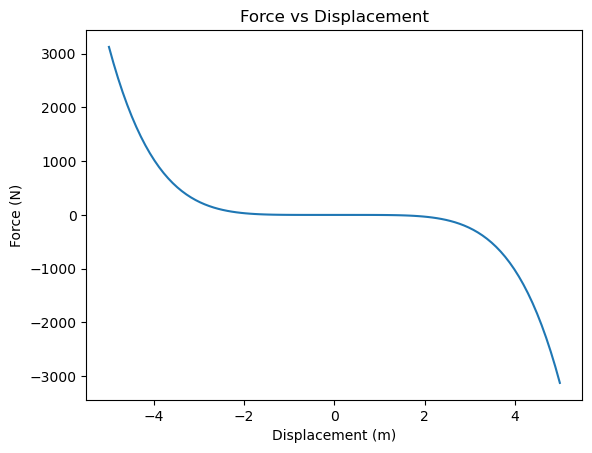

In [4]:
# Plotting
p = 6.
m = 1.
k = 1.
x_arr = np.linspace(-5,5,100)
force_arr = -k*x_arr**(p-1)

plt.plot(x_arr, force_arr)
plt.title("Force vs Displacement")
plt.xlabel("Displacement (m)")
plt.ylabel("Force (N)")
plt.show()


Now, solve for $x$ and $v$ over a few periods of your oscillator. Choose a few different initial conditions such that $\mathbf{f_0} = [0, v_0]$, where $v_0$ is an initial velocity of your chosing. The non-linear oscillator has the very interesting property that its period $T$ is a function of the amplitude $v_0$! This is definitely not true for the simple harmonic oscillator you are used to (otherwise, they would make terrible clocks!) Plot your solutions for two or three different $v_0$ choices, and verify that they have different periods. Make sure you choose a sufficiently small $h$ that you get smooth solutions, but not so small that it takes forever!

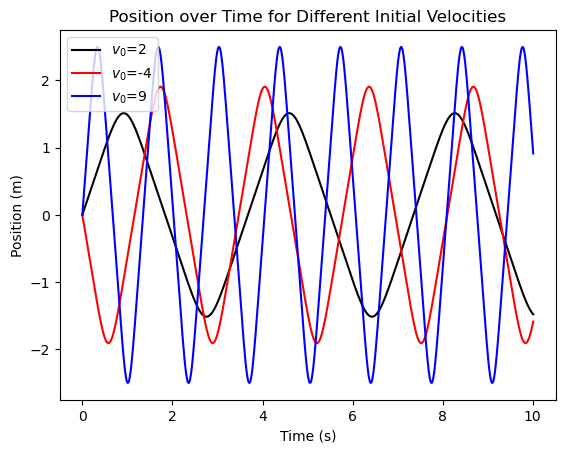

In [5]:
# initial conditions:
v_0_arr = [2,-4,9]
colors = ['black','red','blue']
for i in range(len(v_0_arr)):
    v_0 = v_0_arr[i]
    f0 = np.array([0, v_0])
    t0 = 0. # start at t= 0

    t_stop = 10
    x = [f0[0],]
    v = [f0[1],]
    t = [t0,]
    f_old = f0
    h=0.01 
    while t[-1] < t_stop:
        f_old = rk4(f_old,t[-1],h,force)
        x.append(f_old[0])
        v.append(f_old[1])
        t.append(t[-1]+h)
    plt.plot(t,x, label = f"$v_0$={v_0}", color=colors[i])
plt.title("Position over Time for Different Initial Velocities")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()


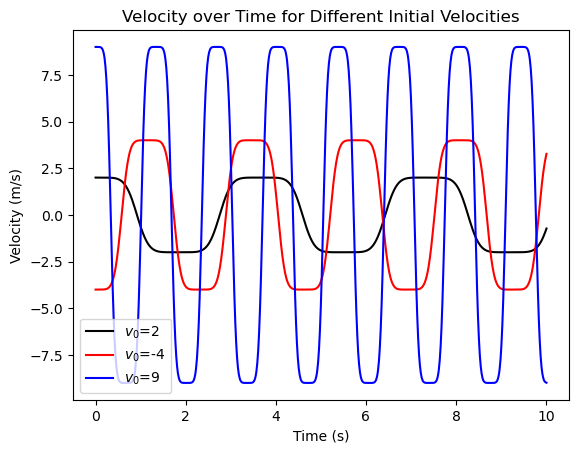

In [6]:
# initial conditions:
v_0_arr = [2,-4,9]
colors = ['black','red','blue']
for i in range(len(v_0_arr)):
    v_0 = v_0_arr[i]
    f0 = np.array([0, v_0])
    t0 = 0. # start at t= 0

    t_stop = 10
    x = [f0[0],]
    v = [f0[1],]
    t = [t0,]
    f_old = f0
    h=0.01 
    while t[-1] < t_stop:
        f_old = rk4(f_old,t[-1],h,force)
        x.append(f_old[0])
        v.append(f_old[1])
        t.append(t[-1]+h)
    plt.plot(t,v, label = f"$v_0$={v_0}", color=colors[i])
plt.title("Velocity over Time for Different Initial Velocities")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.show()

Now, devise a way to measure the period from the data you have collected. Your method must be expressed as an algorithm that the computer can determine for you, but it need not be very precise.

Chose 4 different initial amplitudes, and plot the period vs amplitude.

In [7]:
def period_and_amp(positions, times):
    """
    This function takes in the array of positions over time (and assumes it is long enough to 
    get one period) and waits until we get a value less that epsilon (10^-7) away from the first 
    value and uses this to get the period and amplitude of these nonlinear oscillations.
    """
    x_0 = positions[0]
    epsilon = 1e-8

    # initializing
    for i in range(20,len(positions)): #start a little ahead of initial
        position = positions[i]
        if position-x_0 <= epsilon: # compares floating points--when we get to initial position 
            period = 2*times[i] #we only for to half the period when we return to the same value
            amplitude = abs(positions[round(i/2)]) # the max displacement happens at 1/4 the period
            return (period, amplitude)

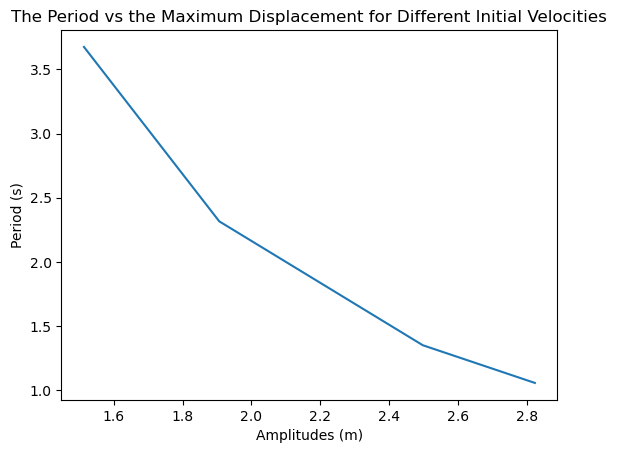

In [8]:
v0s = [2,4,9,13]
periods = []
amplitudes = []
for i in range(len(v0s)):
    ### solving ODE:
    v_0 = v0s[i]
    f0 = np.array([0, v_0])
    t0 = 0. # start at t= 0

    t_stop = 10
    x = [f0[0],]
    v = [f0[1],]
    t = [t0,]
    f_old = f0
    h=0.001
    while t[-1] < t_stop:
        f_old = rk4(f_old,t[-1],h,force)
        x.append(f_old[0])
        v.append(f_old[1])
        t.append(t[-1]+h)
    ### Getting period and amplitude
    (period, amplitude) = period_and_amp(x,t)
    periods.append(period)
    amplitudes.append(amplitude)

plt.plot(amplitudes, periods)
plt.xlabel("Amplitudes (m)")
plt.ylabel("Period (s)")
plt.title("The Period vs the Maximum Displacement for Different Initial Velocities")
plt.show()

### Energy Conservation

Our numerical method knows nothing at all about the concept of energy; it simply integrates 

$$
\frac{d \mathbf{f}}{dt} = \mathbf{g}(t,\mathbf{f}),
$$

without any knowledge of whether or not the equations have something called energy nor whether or not that quantity is conserved. However, Newtonian mechanics most certainly does have a quantity called energy,

$$
E = \frac{1}{2} m v^2 + V(x),
$$

where here $V(x) = k x^6/6$. Chosing a single case for $v_0$, integrate it for at least 50 periods. In the loop you use to do the integration, make sure to save the kinetic $mv^2/2$ and potential $k x^6/6$ energy.

After the loop, in a separate cell, on one plot, plot the kinetic, potential, and total (KE+PE) energies. The total should be constant.

On a separate plot, show the error in energy conservation, $|E(t) - E_0|/E_0$ as a function of time. If it is greater than $\sim 10^{-10}$ or so, you should rethink your stepsize.

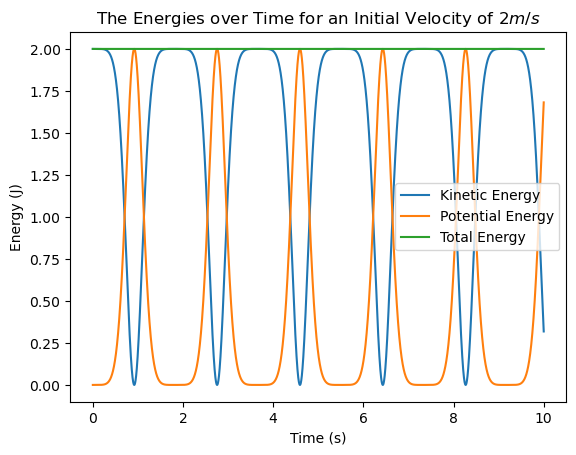

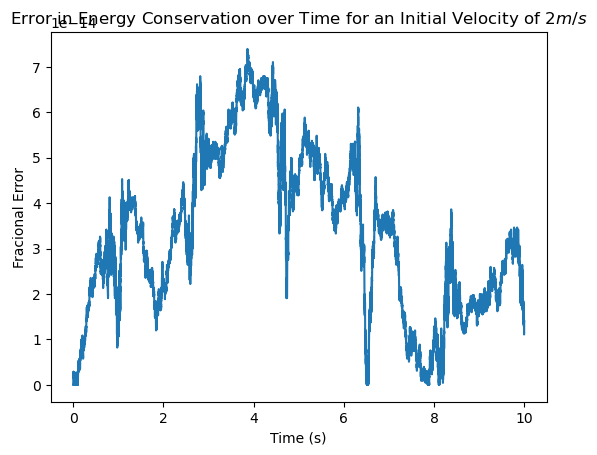

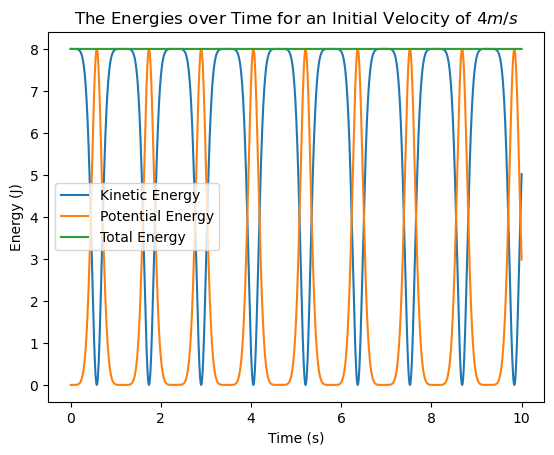

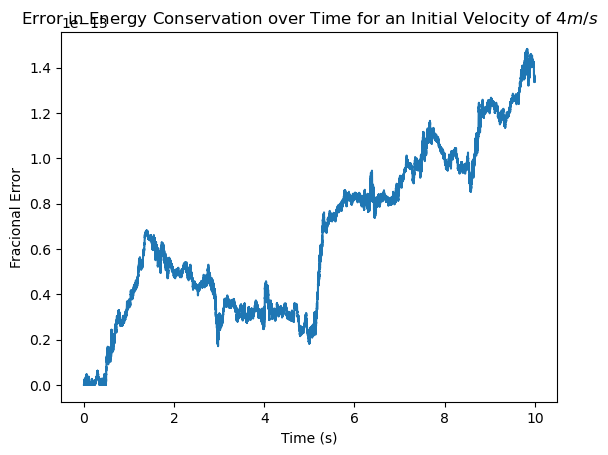

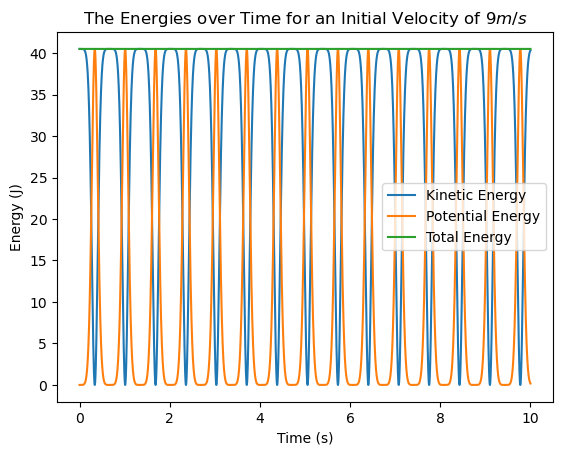

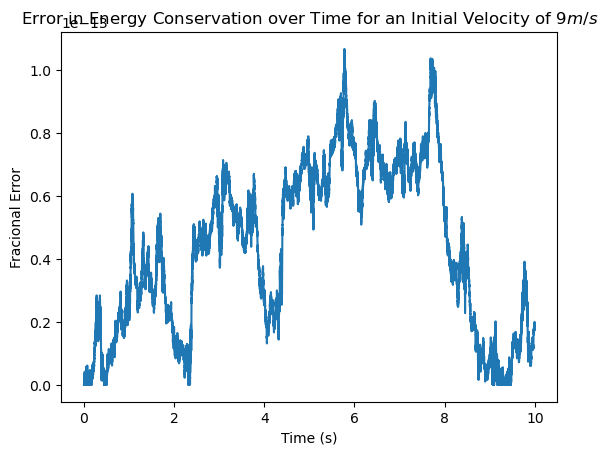

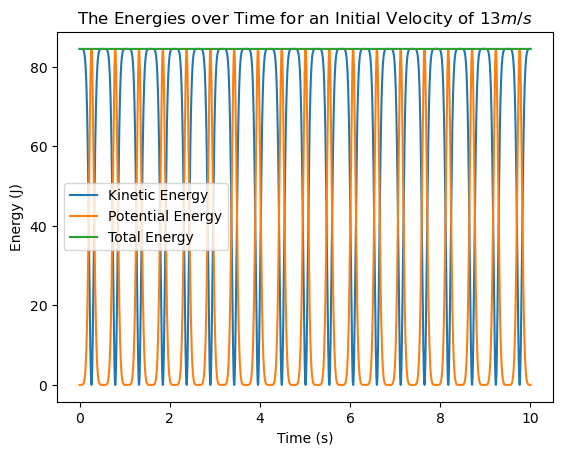

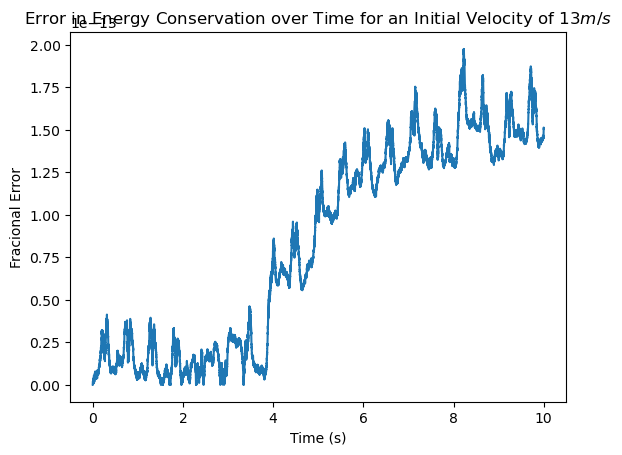

In [9]:
v0s = [2,4,9,13]
for i in range(len(v0s)):
    ### solving ODE:
    v_0 = v0s[i]
    f0 = np.array([0, v_0])
    t0 = 0. # start at t= 0

    t_stop = 10
    x = [f0[0],]
    v = [f0[1],]
    KE = [.5*m*f0[1]**2,]
    PE = [k*f0[0]**6/6,]
    t = [t0,]
    f_old = f0
    h=0.0001
    while t[-1] < t_stop:
        f_old = rk4(f_old,t[-1],h,force)
        x.append(f_old[0])
        v.append(f_old[1])
        t.append(t[-1]+h)
        KE.append(.5*m*f_old[1]**2)
        PE.append(k*f_old[0]**6/6)

    KE = np.array(KE)
    PE = np.array(PE)
    E = KE + PE

    #Plotitng Energies
    plt.plot(t, KE, label = "Kinetic Energy")
    plt.plot(t, PE, label = "Potential Energy")
    plt.plot(t, E, label = "Total Energy")
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    plt.title(f"The Energies over Time for an Initial Velocity of {v_0}$m/s$")
    plt.legend()
    plt.show()

    # Plotting Error in Energy Conservation over Time
    E_err = abs(E-E[0])/E[0]
    plt.plot(t,E_err)
    plt.xlabel("Time (s)")
    plt.ylabel("Fracional Error")
    plt.title(f"Error in Energy Conservation over Time for an Initial Velocity of {v_0}$m/s$")
    plt.show()

<font color = 'blue'>
I had to change my step size but the results drastically minimized the fracional error in my energy conservation. 
</font>

## Problem 2

In lab 6, we derived equations for 1D advection/diffusion. However, for this problem, we will look specifically at 1D heat diffusion. Our function for 1D diffusion is given below. 

You will need to update the boundary conditions to match the conditions of this specific problem!

<font color = 'red'>
10/10
</font>

<font color = 'blue'>
Boundaries were fixed according to the set-up described below. 
</font>

In [10]:
def diffusion(T, del_t, del_x, D):
    T_new = np.zeros(len(T))
    for i in range(len(T)):
        if i >= 1 and i < len(T)-1:
            T_new[i] = T[i] + del_t * D * (T[i+1] -2*T[i] + T[i-1]) / (del_x**2)
	# Boundary Condition:
    T_new[0] = T[0] + del_t * D * (T[1] - 2*T[0] + 100)/ (del_x**2) 
    T_new[-1] = T[-1] + del_t * D * (0 - 2*T[-1] + T[-2]) / (del_x**2)
     
    return T_new

### Set-up

Imagine we have an iron pipe of length 5 meters with the left end of the pipe in contact with a hot reservoir held at a constant 100$\degree$C and the right end of the pipe in contact with a cold reservoir held at a constant 0$\degree$C.

Assume the initial temperature of the entire pipe is 20$\degree$C and a thermal diffusivity constant $\alpha = 23 \frac{mm^2}{s}$. 

Use a $\Delta x$ step size of 0.01 meters and a $\Delta t$ time step size of 0.001 seconds. 

Q1: How long will the pipe take to reach thermal equilibrium? (you can show when equilibrium is reached by finding when the shift in temperature between time steps approaches 0).

Q2: Make a plot of the temperature distribution in time (this can be done by making plots of the temperature distrubtion at descrete times or by having a plot update the result depending on the desired final time). 

In [11]:
T = np.array([20 for i in range(500)]) # in accordance with del_x = .01 -> Nx = 5/.01=500

del_t = 0.001
del_x = 0.01
alpha = 0.023

T_old = T
T_new = np.zeros(len(T_old))   # we don't want to overwrite our initial T

In [12]:
def significant_temp_change_w_time(T_old, T_new, max_allowed_diff_in_temp):
    for i in range(len(T_old)):
        if abs(T_old[i] - T_new[i]) > max_allowed_diff_in_temp:
            return True
    return False # every spot changed my less than the max 
                 # allowed difference in tempature for a timestep

In [13]:
# Let's say that the largest allowed difference in tempature a point can change over one 
# 0.001 seconds is 0.00001 Celcius
max_allowed_diff_in_temp = 0.00001
time = [0]

# getting the tempature at certain times to graph them
T_0 = T_old
Ts_after_initial_to_plot = [np.zeros(len(T_0)) for i in range(8)]

l = 0 # initializing
ls = [1000, 10000,45000,60000,120000,180000,240000,300000]
t_ind = 0
while significant_temp_change_w_time(T_old, T_new, max_allowed_diff_in_temp) or l ==1:  #first time or temp still changing
    if l < 1:
        T_new = diffusion(T_old, del_t, del_x, alpha)
        time.append(round((l+1)*del_t,3))
        l += 1
    T_old = T_new
    T_new = diffusion(T_old, del_t, del_x, alpha)
    time.append(round((l+1)*del_t,3))
    l += 1 # advancing
    
    if l in ls:
        Ts_after_initial_to_plot[t_ind] = T_new
        t_ind += 1



In [14]:
print("Time for Calculated Thermal Equilibrium:", time[-1], "s")

Time for Calculated Thermal Equilibrium: 391.677 s


<font color = 'blue'>
The time it took for the bar to reach thermal equilibrium was 391.667 seconds or about 6 minutes and 32 seconds. I considered thermal equilibrium to be when no section (0.01 meters) of the bar changed by 0.00001 degrees Celcius over 0.0001 seconds or no part of the bar was changing tempature by more than a rate of  0.01 degrees Celcius per second. 
</font>

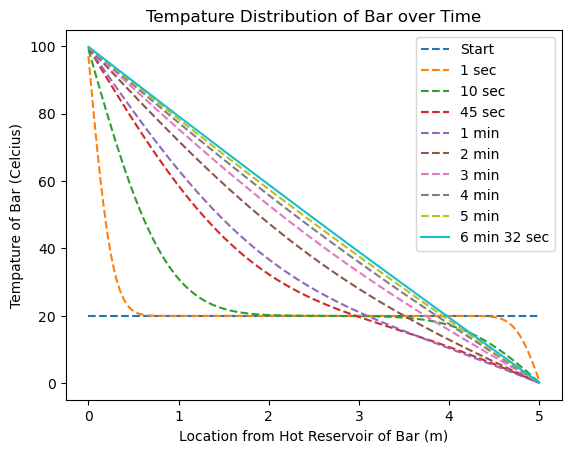

In [15]:
pos_bar = np.linspace(0,5,500)
times = ['1 sec', '10 sec', '45 sec', '1 min', '2 min', '3 min', '4 min', '5 min']

plt.plot(pos_bar, T_0, label = "Start", linestyle = "dashed")
for i in range(len(Ts_after_initial_to_plot)):
    plt.plot(pos_bar, Ts_after_initial_to_plot[i], label = times[i], linestyle = "dashed")
plt.plot(pos_bar, T_new, label = "6 min 32 sec")
plt.title("Tempature Distribution of Bar over Time")
plt.xlabel("Location from Hot Reservoir of Bar (m)")
plt.ylabel("Tempature of Bar (Celcius)")
plt.legend()
plt.show()

### Time Step Size and Numeric Stability

To return a stable result, it is important to not exceed the maximum time step size, which is:

$$\Delta t = \frac{\Delta x^{2}}{4\alpha}$$

Q3. Compare and evaluate the temperature distribution of the pipe using $\Delta t$ values between 0.0005 and 0.005 seconds over 10 seconds.



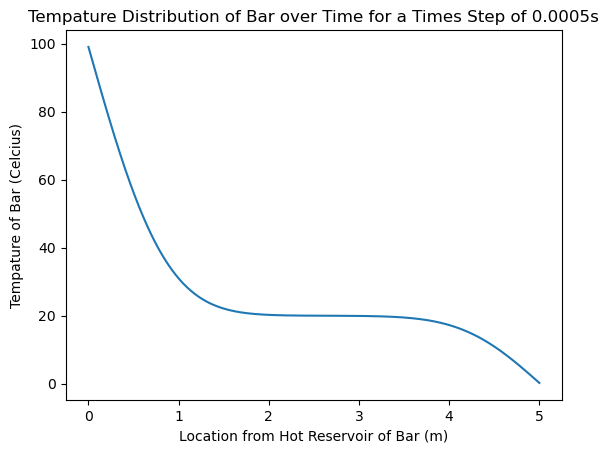

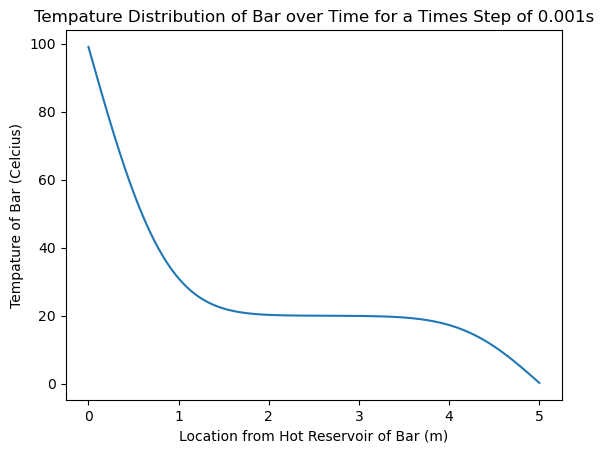

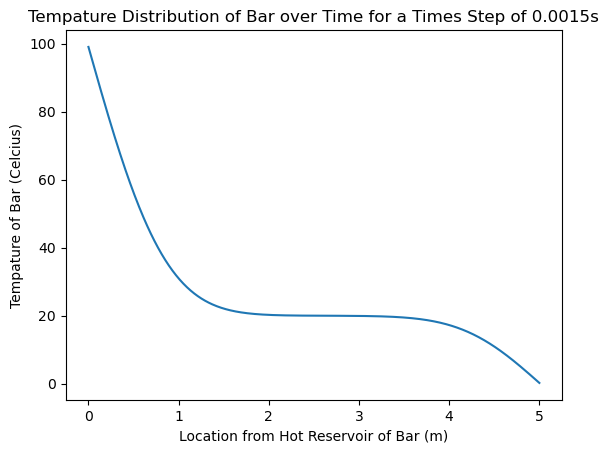

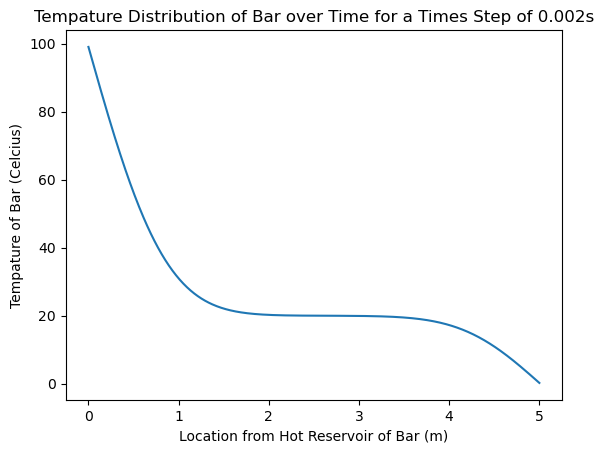

/tmp/ipykernel_61/2565448665.py:5: RuntimeWarning: overflow encountered in double_scalars
  T_new[i] = T[i] + del_t * D * (T[i+1] -2*T[i] + T[i-1]) / (del_x**2)
/tmp/ipykernel_61/2565448665.py:5: RuntimeWarning: invalid value encountered in double_scalars
  T_new[i] = T[i] + del_t * D * (T[i+1] -2*T[i] + T[i-1]) / (del_x**2)
/tmp/ipykernel_61/2565448665.py:7: RuntimeWarning: overflow encountered in double_scalars
  T_new[0] = T[0] + del_t * D * (T[1] - 2*T[0] + 100)/ (del_x**2)
/tmp/ipykernel_61/2565448665.py:7: RuntimeWarning: invalid value encountered in double_scalars
  T_new[0] = T[0] + del_t * D * (T[1] - 2*T[0] + 100)/ (del_x**2)
/tmp/ipykernel_61/2565448665.py:8: RuntimeWarning: overflow encountered in double_scalars
  T_new[-1] = T[-1] + del_t * D * (0 - 2*T[-1] + T[-2]) / (del_x**2)
/tmp/ipykernel_61/2565448665.py:8: RuntimeWarning: invalid value encountered in double_scalars
  T_new[-1] = T[-1] + del_t * D * (0 - 2*T[-1] + T[-2]) / (del_x**2)


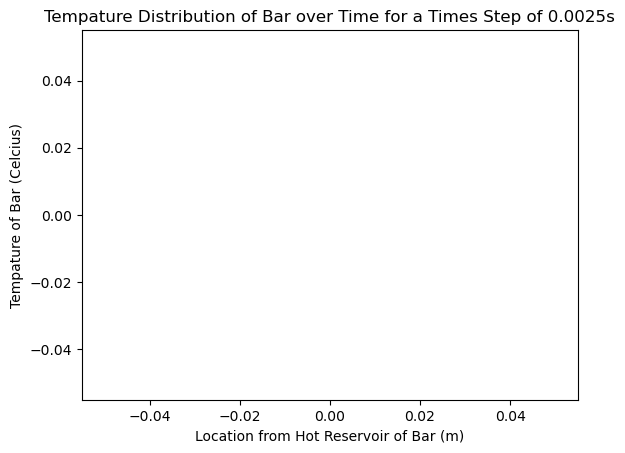

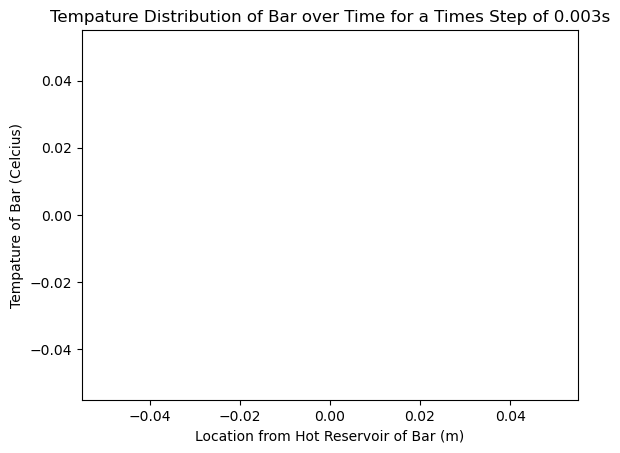

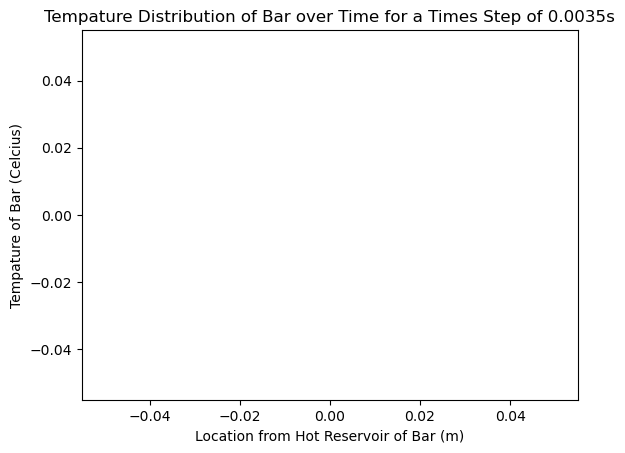

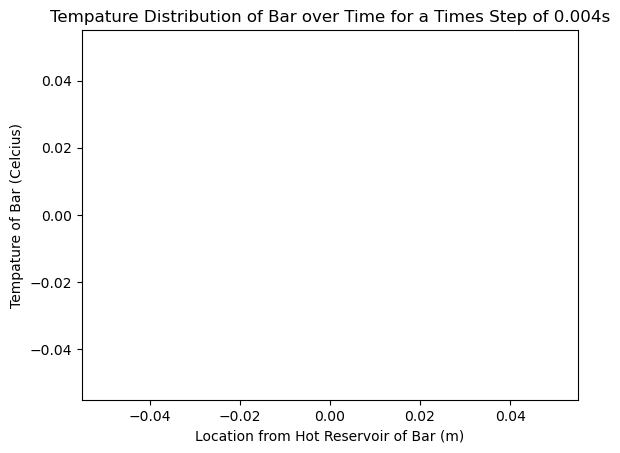

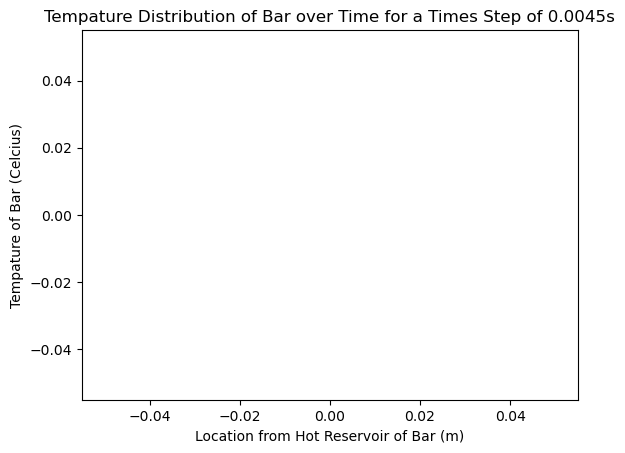

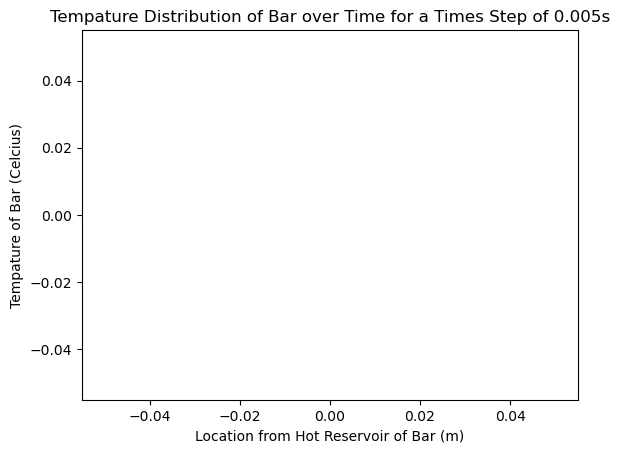

In [16]:
del_ts = np.linspace(0.0005, 0.005, 10)


for i in range(len(del_ts)):
    T = np.array([20 for i in range(500)]) # in accordance with del_x = .01 -> Nx = 5/.01=500
    del_t = del_ts[i]
    del_x = 0.01
    alpha = 0.023

    T_old = T
    T_new = np.zeros(len(T_old))   # we don't want to overwrite our initial T

    # Let's say that the largest allowed difference in tempature a point can change over one 
    # 0.001 seconds is 0.00001 Celcius
    time = [0]

    l = 0 # initializing
    while time[-1]<=10:  #stops after 10 seconds
        if l < 1:
            T_new = diffusion(T_old, del_t, del_x, alpha)
            time.append(round((l+1)*del_t,3))
            l += 1
        T_old = T_new
        T_new = diffusion(T_old, del_t, del_x, alpha)
        time.append(round((l+1)*del_t,3))
        l += 1 # advancing

    plt.plot(pos_bar, T_new, label = f"")
    plt.title(f"Tempature Distribution of Bar over Time for a Times Step of {round(del_ts[i],4)}s")
    plt.xlabel("Location from Hot Reservoir of Bar (m)")
    plt.ylabel("Tempature of Bar (Celcius)")
    plt.show()


<font color = 'blue'>
As we can see above, for timesteps about 0.0025s and above the tempature starts to tend towards infinity and out solution blows up. That is why the graphs are empty. Other wise a sufficiently small enough timestep gives us approximately the same result for the tempature of the bar after 10 seconds. 
</font>